# MLP ( Multi - layer Perceptron )

In [16]:
from keras import models, layers
from sklearn.model_selection import train_test_split

In [20]:
model = models.Sequential([
    layers.Dense(256, input_shape=(32,)), #Layer 1 along with inputs given
    layers.Dense(32), #Layer 2
    layers.Dense(16), #Layer 3
    layers.Dense(1) #Layer 4
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# It gives the summary of the model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 256)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,217 (67.25 KB)

 Trainable params: 17,217 (67.25 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Compilation of our model ( adam -> chooses a learning rate precisely instead of us manually checking every learning rate )
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [23]:
# Dataset to generate random dataset
import numpy as np
from sklearn.model_selection import train_test_split

# 1. Generate full random dataset
# X: 6000 samples, 32 features
X = np.random.rand(6000, 32)
# y: 6000 samples, output either 0 or 1
y = np.random.randint(0, 2, 6000)

print(f"Total X shape: {X.shape}")
print(f"Total y shape: {y.shape}")

Total X shape: (6000, 32)
Total y shape: (6000,)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=42)

In [25]:
# Create a validation set to ensure we are gng in the right direction
X_train , X_val , y_train , y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [27]:
model.fit(X_train , y_train , epochs=5 , validation_data=(X_val , y_val))

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5259 - loss: 0.2507 - val_accuracy: 0.5240 - val_loss: 0.2504
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5377 - loss: 0.2488 - val_accuracy: 0.5130 - val_loss: 0.2506
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5263 - loss: 0.2493 - val_accuracy: 0.5080 - val_loss: 0.2504
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5302 - loss: 0.2492 - val_accuracy: 0.5110 - val_loss: 0.2494
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5292 - loss: 0.2500 - val_accuracy: 0.5000 - val_loss: 0.2506


# Real-world Datasets

In [1]:
# MNIST DATASET USED TO RECOGNISE HAND WRITTEN DIGITS
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Load data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values (0 to 1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print("Data loaded.")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Data loaded.


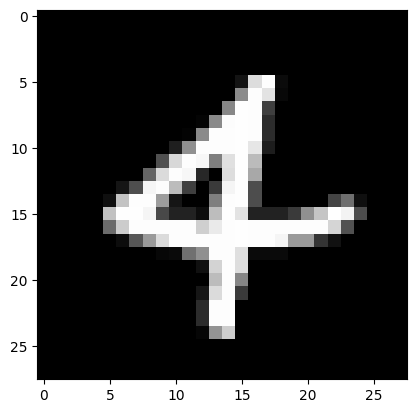

Label: 5


In [3]:
#Visualization of a single digit
plt.imshow(X_train[150], cmap='gray')
plt.show()
print("Label:", y_train[0])

In [4]:
# Flattening the data since our model cannot accept 2d images for now
x_train_flat = X_train.reshape((-1,784))
x_test_flat = X_test.reshape((-1,784))

In [8]:
# Train the decision tree and find the accuracy for the dataset.
model = DecisionTreeClassifier()
model.fit(x_train_flat, y_train)

DecisionTreeClassifier()

In [9]:
# Accuracy of the dataset
accuracy = accuracy_score(y_test, model.predict(x_test_flat))
accuracy

0.8822

In [10]:
# Logistic Regression
model = LogisticRegression()
model.fit(x_train_flat, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
y_pred = model.predict(x_test_flat)
accuracy_score(y_test , y_pred)

0.9256

In [16]:
model = models.Sequential([
    layers.Dense(256, activation='relu',input_shape=(784,)),
    layers.Dense(16,activation='sigmoid'),
    layers.Dense(10,activation='softmax') #we get probabilities of each digit , softmax helps us choose one of them.
])

model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [17]:
x_train_flat.shape

(60000, 784)

In [18]:
model.fit(x_train_flat , y_train , epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7535 - loss: 1.0742
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9571 - loss: 0.2033
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9737 - loss: 0.1118
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9825 - loss: 0.0727
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9862 - loss: 0.0535
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9919 - loss: 0.0363
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9939 - loss: 0.0278
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9948 - loss: 0.0224
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9961 - loss: 0.0179
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9968 - loss: 0.0138


In [20]:
loss, mlp_acc = model.evaluate(x_test_flat, y_test)
mlp_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9749 - loss: 0.0869


0.9790999889373779

In [23]:
from google.colab import files
from PIL import Image
import numpy as np

# 1. Upload the image
uploaded = files.upload()
filename = next(iter(uploaded)) # Gets the name of the file you just uploaded

# 2. Load and process the image
img = Image.open(filename).convert('L')  # Convert to grayscale (black and white)
img = img.resize((28, 28))               # Resize to 28x28 pixels
img_array = np.array(img)                # Turn into numbers

# 3. Invert colors (MNIST is white text on black background, but you likely wrote black on white)
img_array = 255 - img_array

# 4. Normalize and Flatten
img_array = img_array / 255.0            # Scale to 0-1
img_flat = img_array.reshape(1, 784)     # Flatten to (1, 784)

# 5. Predict
prediction = model.predict(img_flat)
print(f"I think you wrote a: {np.argmax(prediction)}")

Saving Screenshot 2026-02-04 at 10.00.48 AM.png to Screenshot 2026-02-04 at 10.00.48 AM (1).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
I think you wrote a: 2
